In [4]:
using LinearAlgebra, Statistics, Plots, LaTeXStrings

In [5]:
randn()

0.3798705582634178

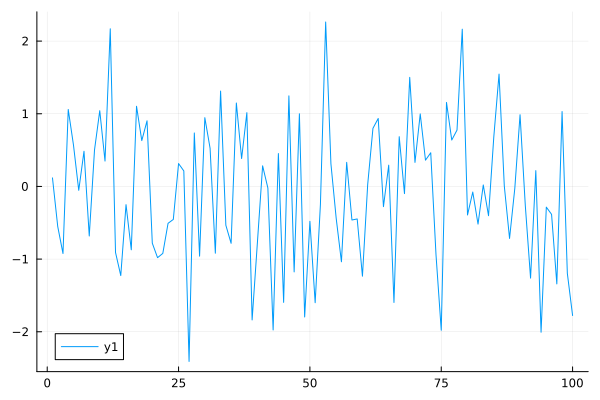

In [6]:
n = 100
ep = randn(n)
plot(1:n, ep)

In [7]:
typeof(ep)

Vector{Float64} (alias for Array{Float64, 1})

In [8]:
ep[1:5]

5-element Vector{Float64}:
  0.11750597793329168
 -0.5513522731395744
 -0.9233394125183759
  1.0590699153266272
  0.5680040737977657

In [9]:
# poor style
n = 100 
ep = zeros(n)
for i in 1:n
    ep[i] = randn()
end


In [10]:
# better style
n = 100
ep = zeros(n)
for i in eachindex(ep)
    ep[i] = randn()
end

In [11]:
ep_sum = 0.0 # careful to use 0.0 here, instead of 0
m = 5
for ep_val in ep[1:m]
    ep_sum = ep_sum + ep_val
end
ep_mean = ep_sum / m

-0.27990558496430074

In [12]:
ep_mean ≈ mean(ep[1:m])
isapprox(ep_mean, mean(ep[1:m])) # equivalent
ep_mean ≈ sum(ep[1:m]) / m

true

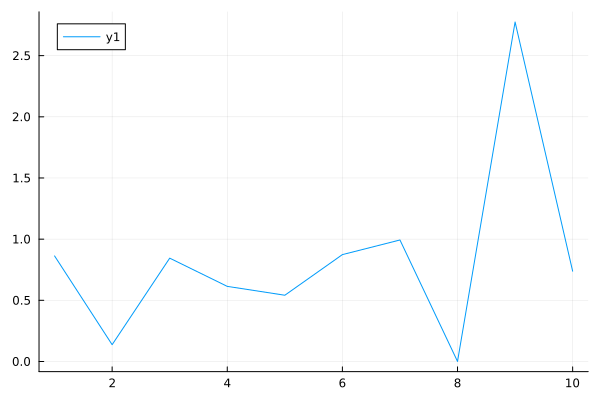

In [13]:
# poor style
function generatedata(n)
    ep = zeros(n)
    for i in eachindex(ep)
        ep[i] = (randn())^2 # squaring the result
    end
    return ep
end

data = generatedata(10)
plot(data)

In [14]:
# still poor style
function generatedata(n)
    ep = randn(n) # use built in function

    for i in eachindex(ep)
        ep[i] = ep[i]^2 # squaring the result
    end

    return ep
end
data = generatedata(5)

5-element Vector{Float64}:
 3.5850964809073647
 0.0004970947469996268
 0.8187089855829491
 2.853194115158644
 0.298258577563831

In [15]:
# better style
function generatedata(n)
    ep = randn(n) # use built in function
    return ep .^ 2
end
data = generatedata(5)

5-element Vector{Float64}:
 0.15940644789726627
 0.3277799670819911
 0.06169930704354285
 2.2239715630519585
 0.025048937210973815

In [16]:
# good style
generatedata(n) = randn(n) .^ 2
data = generatedata(5)

5-element Vector{Float64}:
 2.782572821887292
 2.3991670491501287
 1.3772028063226456
 2.395521193216056
 0.5123840424380472

In [17]:
# good style
f(x) = x^2 # simple square function
generatedata(n) = f.(randn(n)) # broadcasts on f
data = generatedata(5)

5-element Vector{Float64}:
 0.129421031556042
 0.9744968228579984
 0.40872821089772543
 0.4368627635295811
 0.8772128600005478

In [18]:
generatedata(n, gen) = gen.(randn(n)) # broadcasts on gen
f(x) = x^2 # simple square function
data = generatedata(5, f) # applies f

5-element Vector{Float64}:
 0.1108810661518131
 0.5200677898780859
 0.0037232498575367414
 0.7222131416450978
 0.8229986758242673

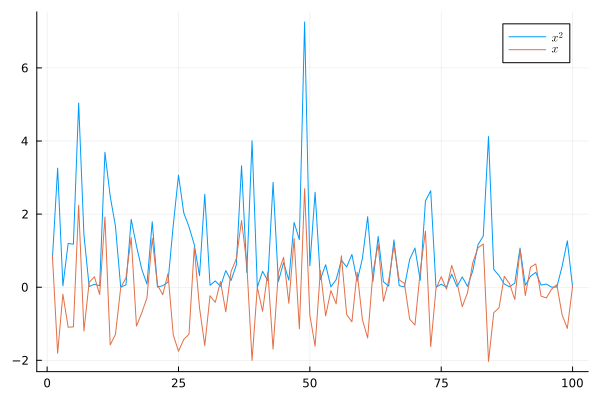

In [19]:
# direct solution with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label = L"x^2")
plot!(x, label = L"x") # layer on the same plot

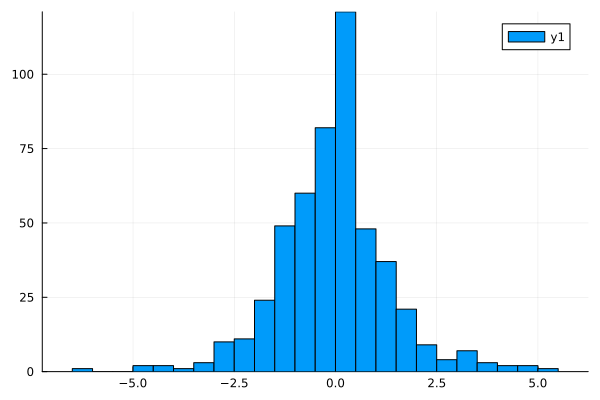

In [21]:
using Distributions

function plothistogram(distribution, n)
    ep = rand(distribution, n)  # n draws from distribution
    histogram(ep)
end

lp = Laplace()
plothistogram(lp, 500)

In [22]:
rand(3)

3-element Vector{Float64}:
 0.5126721873304534
 0.4300522796920525
 0.6786567906672254

In [24]:
# poor style
p = 1.0 # note 1.0 rather than 1
beta = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # initial condition

# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
    v_new = p + beta * v_old # the f(v) map
    normdiff = norm(v_new - v_old)

    # replace and continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [25]:
# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
for i in 1:maxiter
    v_new = p + beta * v_old # the f(v) map
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance # check convergence
        iter = i
        break # converged, exit loop
    end
    # replace and continue
    v_old = v_new
end
println("Fixed point = $v_old
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231
  |f(x) - x| = 9.181037796679448e-8 in 154 iterations


In [26]:
# better, but still poor style
function v_fp(beta, ρ, v_iv, tolerance, maxiter)
    # setup the algorithm
    v_old = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = p + beta * v_old # the f(v) map
        normdiff = norm(v_new - v_old)

        # replace and continue
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter) # returns a tuple
end

# some values
p = 1.0 # note 1.0 rather than 1
beta = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = v_fp(beta, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [27]:
# better style
function fixedpointmap(f, iv, tolerance, maxiter)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
p = 1.0
beta = 0.9
f(v) = p + beta * v # note that p and beta are used in the function!

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [28]:
# good style
function fixedpointmap(f, iv; tolerance = 1E-7, maxiter = 1000)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (; value = x_old, normdiff, iter) # A named tuple
end

# define a map and parameters
p = 1.0
beta = 0.9
f(v) = p + beta * v # note that p and beta are used in the function!

sol = fixedpointmap(f, 0.8; tolerance = 1.0E-8) # don't need to pass
println("Fixed point = $(sol.value)
  |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035
  |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [29]:
(; value, normdiff, iter) = fixedpointmap(f, 0.8; tolerance = 1.0E-8)
println("Fixed point = $value
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999918629035
  |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [30]:
r = 2.0
f(x) = r * x * (1 - x)

sol = fixedpointmap(f, 0.8) # the ; is optional but generally good style
println("Fixed point = $(sol.value)
  |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968
  |f(x) - x| = 3.979330237546819e-8 in 7 iterations


In [33]:
# best style
using NLsolve

p = 1.0
beta = 0.9
f(v) = p .+ beta * v # broadcast the +
sol = fixedpoint(f, [0.8]; m = 0)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [9.999999909587816]
  |f(x) - x| = 9.041219328764782e-9 in 176 iterations


In [34]:
eps()

2.220446049250313e-16

In [35]:
# use arbitrary precision floating points
p = 1.0
beta = 0.9
iv = [BigFloat(0.8)] # higher precision

# otherwise identical
sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155]
  |f(x) - x| = 0.0 in 3 iterations


In [36]:
p = [1.0, 2.0]
beta = 0.9
iv = [0.8, 2.0]
f(v) = p .+ beta * v # note that p and beta are used in the function!

sol = fixedpointmap(f, iv; tolerance = 1.0E-8)
println("Fixed point = $(sol.value)
  |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = [9.999999961080519, 19.999999923853192]
  |f(x) - x| = 9.501826248250528e-9 in 184 iterations


In [37]:
using NLsolve

p = [1.0, 2.0, 0.1]
beta = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ beta * v

sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929]
  |f(x) - x| = 6.661338147750939e-16 in 3 iterations


In [38]:
using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1]
beta = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ beta * v

sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

LoadError: ArgumentError: Package StaticArrays not found in current path.
- Run `import Pkg; Pkg.add("StaticArrays")` to install the StaticArrays package.